In [1]:
repo = "http://cran.us.r-project.org"
library(caret)
library(ggfortify)
library(ggplot2)
library(dplyr)
library(RSQLite)
library(DBI)
library(class)
library(pscl)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggfortify' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'RSQLite' was built under R version 3.3.3"Warning message:
"package 'DBI' was built under R version 3.3.3"Warning message:
"package 'pscl' was built under R version 3.3.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University



In [2]:
remove_cols= function(l, cols){
    return(l[! l %in% cols])
}

In [3]:
base_dir<- "C:/Users/Jeff/Documents/research/Sadler_3rdPaper/manuscript/"
data_dir<- "C:/Users/Jeff/Google Drive/research/Sadler_3rdPaper_Data/"
fig_dir <- paste(base_dir, "Figures/general/", sep="")
db_filename <- "floodData.sqlite"

In [4]:
con = dbConnect(RSQLite::SQLite(), dbname=paste(data_dir, db_filename, sep=""))

In [5]:
df = dbReadTable(con, 'for_model_avgs')

In [6]:
colnames(df)


[1] "event_date"  "event_name"  "num_flooded" "WDF2"        "WSF2"       
 [6] "AWDR"        "AWND"        "WGF6"        "WSF6"        "WDF6"       
[11] "ht"          "hht"         "lt"          "llt"         "r15"        
[16] "rhr"         "td_av"       "gw_av"       "r15mx"       "rhrmx"      
[21] "rd"          "r3d"

In [7]:
cols_to_remove = c('event_name', 'event_date', 'num_flooded')
in_col_names = remove_cols(colnames(df), cols_to_remove)
# in_col_names = c('td_av', 'llt')
out_col_name = 'num_flooded'

In [8]:
model_data = df[, append(in_col_names, out_col_name)]
nrow(model_data)
model_data = na.omit(model_data)
model_data = model_data[model_data[,'rd']>0.01,]
nrow(model_data)
model_data


[1] 2172

[1] 814

,WDF2,WSF2,AWDR,AWND,WGF6,WSF6,WDF6,ht,hht,lt,llt,r15,rhr,td_av,gw_av,r15mx,rhrmx,rd,r3d,num_flooded
1,121.66667,25.96667,291.66667,12.100000,12.100000,12.100000,291.66667,3.21050,3.61750,1.18600,0.53300,0.9729583,1.0587361,1.452974306,4.3406990,0.60500000,1.32250000,7.73250000,3.518000e+00,101
2,205.00000,15.00000,213.00000,2.700000,2.700000,2.700000,213.00000,0.66100,0.86100,-1.13000,-1.22350,-0.0140303,0.1098788,-0.202139583,2.2083260,0.03000000,0.07000000,0.22750000,4.500000e-02,2
3,158.75000,27.12500,133.00000,14.350000,13.953947,8.564103,133.61137,2.23750,4.96800,2.69850,-0.69250,2.2532500,2.4728611,1.095752604,2.3340485,0.35000000,1.10125000,6.29416667,3.080000e-01,110
4,48.09839,30.93389,123.00000,23.900000,20.061461,11.923954,110.73012,5.22800,5.57600,3.28400,1.58100,3.2158819,3.0279514,2.749343750,2.9984932,0.14000000,0.42625000,4.80583333,3.410000e-01,105
5,38.76321,25.98768,25.66667,21.183333,15.315069,8.769403,41.51250,3.49250,4.21250,2.08300,1.08450,2.6816875,2.8765764,2.244864583,2.1418366,0.37500000,0.80000000,3.67166667,9.240000e-01,36
6,205.55543,16.63738,213.00000,8.050000,9.721000,6.620833,222.54583,1.84200,2.63900,-0.98425,-0.98425,0.5756914,1.0167284,0.560302083,3.6207730,0.49888889,1.41333333,2.92333333,1.272727e-02,35
7,181.73207,12.57018,192.00000,9.250000,8.440377,5.730628,194.67782,1.04650,1.80950,-0.88900,-1.01400,0.3183000,0.3335333,0.306097917,2.3629127,0.01555556,0.01888889,0.01666667,2.727273e-03,1
8,160.62590,15.70444,138.00000,7.725000,7.648271,5.100042,201.54375,1.85100,2.11200,-0.74300,-0.76450,1.0789506,1.0209012,0.581873958,2.4327142,0.55666667,0.86111111,0.74750000,2.727273e-03,5
9,235.81490,19.83450,263.50000,13.600000,13.990583,8.885667,216.27292,1.83550,2.14250,0.66950,0.01800,0.9701358,1.0293210,0.668728125,2.1625958,0.22333333,0.38333333,1.03916667,1.363636e-02,8
10,250.19680,25.31077,218.00000,10.850000,10.333042,6.774792,225.89167,0.38750,1.35500,-1.76125,-1.76125,0.7570617,0.9575432,-0.288447917,0.7108298,0.46333333,0.90666667,1.36750000,2.727273e-03,2


In [9]:
prt = createDataPartition(model_data[, out_col_name], p=0.7)

In [10]:
train_data = model_data[prt$Resample1,]
train_in_data = model_data[prt$Resample1, in_col_names]
train_out_data = model_data[prt$Resample1, out_col_name]
test_in_data = model_data[-prt$Resample1, in_col_names]
test_out_data = model_data[-prt$Resample1, out_col_name]

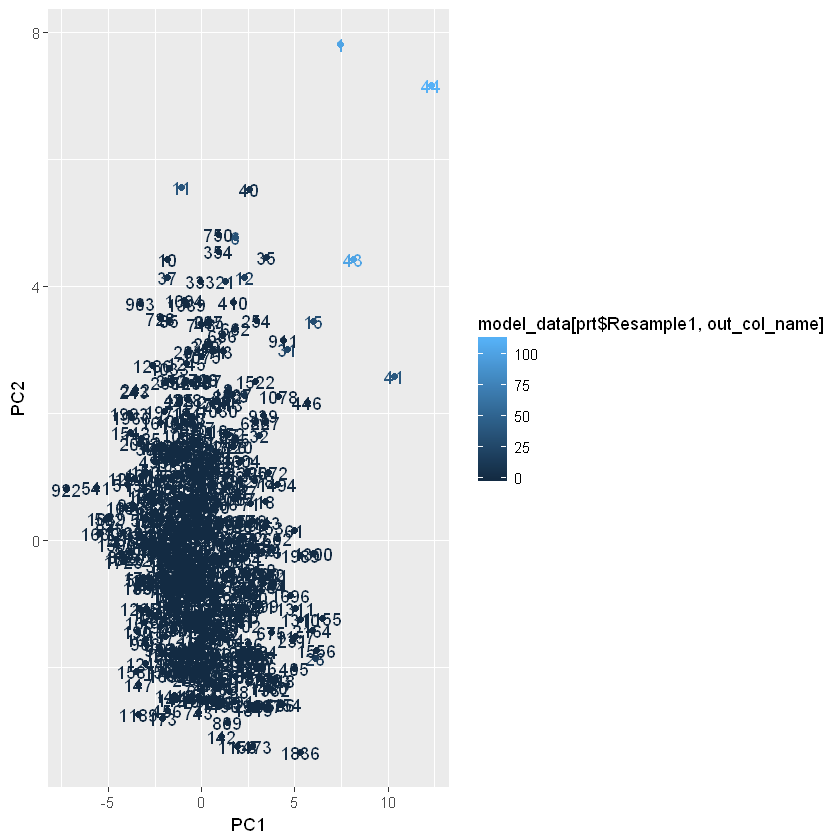

In [11]:
train_col_stds = apply(train_in_data, 2, sd)
train_col_means = colMeans(train_in_data)

train_normalized = t((t(train_in_data)-train_col_means)/train_col_stds)
test_normalized = t((t(test_in_data)-train_col_means)/train_col_stds)

pca = prcomp(train_normalized)
pca$x = -pca$x
pca$rotation=-pca$rotation
p = ggplot(pca$x[,c(1,2)], aes(x=PC1, y=PC2, colour=model_data[prt$Resample1, out_col_name], label=rownames(pca$x)))
p + geom_point() + geom_text()

In [12]:
trn_preprocessed = predict(pca, train_normalized)
tst_preprocessed = predict(pca, test_normalized)

In [13]:
fmla = as.formula(paste(out_col_name, "~", paste(colnames(trn_preprocessed), collapse="+")))
fmla

num_flooded ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + 
    PC9 + PC10 + PC11 + PC12 + PC13 + PC14 + PC15 + PC16 + PC17 + 
    PC18 + PC19

In [14]:
train_data = cbind(as.data.frame(trn_preprocessed), num_flooded = model_data[prt$Resample1, out_col_name])

In [15]:
output = zeroinfl(fmla, data=train_data, family = poisson)

Warning message:
"glm.fit: fitted rates numerically 0 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in optim(fn = loglikfun, gr = gradfun, par = c(start$count, start$zero, :
"unknown names in control: family"

In [16]:
summary(output)

## Train Data evaluation

In [17]:
train_fld = train_out_data[train_out_data>0]
pred_trn = predict(output, newdata = as.data.frame(trn_preprocessed), type='response')
pred_trn_capped = replace(pred_trn, pred_trn > 159, 159)
pred_trn_fld = pred_trn_capped[model_data[prt$Resample1, out_col_name]>0]

In [18]:
mean(abs(pred_trn_capped - train_out_data))
mean(abs(train_fld - pred_trn_fld))

[1] 0.4144751

[1] 4.479875

In [19]:
max_val = max(max(train_fld), max(pred_trn_fld))

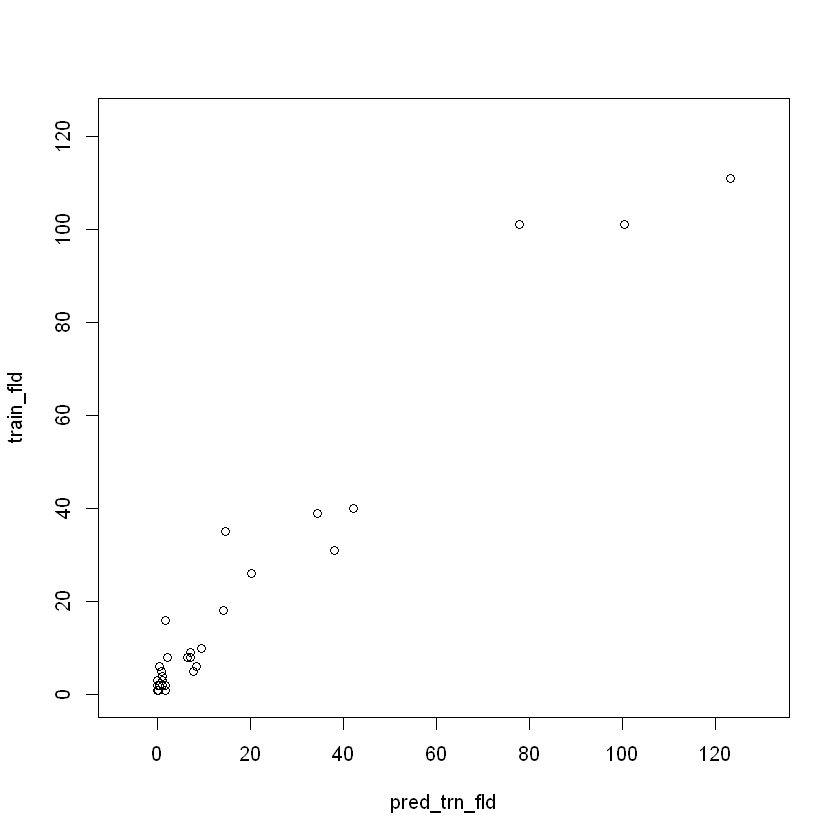

In [20]:
plot(pred_trn_fld, train_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

## Test data

In [21]:
test_out_data
test_fld = test_out_data[test_out_data>0]
pred = predict(output, newdata = as.data.frame(tst_preprocessed), type='response')
max(pred)
pred_capped = replace(pred, pred > 159, 159)
pred_fld = pred_capped[model_data[-prt$Resample1, out_col_name]>0]
pred_capped

[1] 110 105  36   1   7  10 159   1   1  11   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[163]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[181]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[199]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[217]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[235]   0   0   0   0   0   0   0   0   0   0

[1] 289.8232

3            4            5           17           22           23 
1.854959e+01 5.990924e+00 2.000349e+01 2.144375e-01 7.853704e+01 2.377297e+01 
          27           28           33           42           58           59 
1.590000e+02 3.475711e-01 1.245407e-03 9.390857e+00 1.300220e-01 3.117433e-02 
          82           93          104          119          122          131 
5.528265e-03 9.604439e-02 2.757745e-03 1.203069e-03 3.120203e-01 1.220401e-01 
         145          146          153          165          166          181 
1.349994e-01 1.443175e-04 1.039857e-02 2.281827e-04 6.398914e-02 5.735604e-04 
         188          189          203          217          223          237 
1.572541e-03 3.143109e-04 1.730739e-02 4.134310e-03 1.249935e-03 5.686693e-05 
         240          247          260          272          275          285 
2.332760e-05 5.118461e-04 1.225511e-03 7.186258e-02 1.400406e-02 1.036433e-04 
         286          291          316          317          319          321 
4.271282e-04 3.472465e-04 8.656238e-03 1.446807e-03 6.726601e-04 4.981192e-02 
         334          335          353          360          385          395 
2.119726e-02 9.635284e-02 3.687218e-01 3.398970e-02 1.909596e-05 3.694146e-04 
         402          412          417          430          436          445 
9.899613e-05 4.029633e-05 1.824730e-04 3.176543e-03 1.508057e-03 7.947512e-04 
         449          450          495          518          529          533 
1.753146e-02 4.857883e-01 1.764216e-03 7.001430e-03 3.169517e-04 7.662623e-04 
         536          542          551          554          556          569 
9.399089e-04 6.572779e-03 2.029000e-04 5.584939e-03 1.615552e-02 1.099581e-02 
         570          604          605          619          621          629 
5.946948e-04 9.882877e-03 1.592350e-05 1.000449e-03 9.341271e-03 1.051491e-02 
         657          664          683          697          712          719 
8.948777e-04 2.418925e-03 4.380058e-01 1.613539e-03 3.415413e+00 1.247098e-02 
         724          725          742          748          755          759 
5.279747e-03 3.121888e-03 2.219199e-01 5.691561e-03 9.138360e-03 5.730811e-02 
         772          782          784          798          818          831 
7.488614e-05 1.038200e-03 1.217030e-02 1.278754e-01 2.506115e-03 1.370178e-02 
         850          854          858          874          878          881 
2.719593e-03 7.215202e-03 3.331893e-03 1.584631e-02 1.397738e-02 1.656579e-02 
         883          886          887          890          898          899 
2.635848e-04 1.444102e-03 3.709487e-03 3.967642e-04 7.951873e-03 1.854669e-02 
         916          937          943          949          956          974 
9.290651e-03 3.237383e-02 8.930816e-05 3.635849e-02 1.976710e-03 1.864085e-02 
         984          990          998         1000         1003         1009 
1.420303e-04 3.373881e-04 6.340595e-04 3.073725e-03 7.301731e-03 1.124245e-02 
        1012         1013         1031         1069         1077         1085 
7.516015e-03 1.532292e-01 2.871373e-03 7.517492e-03 9.753961e-04 8.854488e-02 
        1090         1096         1100         1106         1112         1113 
3.519011e-03 5.863349e-02 1.012058e-02 3.951045e-03 9.027158e-01 1.763933e-01 
        1114         1116         1174         1195         1196         1207 
3.731213e-02 2.375361e-01 2.578062e-02 1.840701e-01 3.739677e-02 6.368033e-03 
        1226         1227         1239         1240         1255         1262 
4.743496e-04 8.053222e-04 1.057547e-03 4.671808e-04 1.891732e-05 2.277032e-03 
        1263         1264         1266         1270         1277         1280 
4.689527e-03 9.175600e-03 7.836684e-03 1.980547e-02 1.359235e-02 1.118203e-03 
        1296         1298         1305         1312         1316         1317 
6.700470e-04 7.281421e-05 1.760082e-03 3.124264e-04 4.990155e-05 1.095972e-01 
        1331         1343         1349         1364         1

In [22]:
sort(pred_capped)

1988          605         1255          385          240          412 
9.752596e-06 1.592350e-05 1.891732e-05 1.909596e-05 2.332760e-05 4.029633e-05 
        1959         1681         1316          237         1298          772 
4.038644e-05 4.358208e-05 4.990155e-05 5.686693e-05 7.281421e-05 7.488614e-05 
        1620          943         1965         2086          402          285 
8.080127e-05 8.930816e-05 9.288007e-05 9.547173e-05 9.899613e-05 1.036433e-04 
         984          146          417          551          165         1911 
1.420303e-04 1.443175e-04 1.824730e-04 2.029000e-04 2.281827e-04 2.286024e-04 
        2167          883         1312          189          529          990 
2.440283e-04 2.635848e-04 3.124264e-04 3.143109e-04 3.169517e-04 3.373881e-04 
         291         1878          395         2032          890          286 
3.472465e-04 3.674048e-04 3.694146e-04 3.891276e-04 3.967642e-04 4.271282e-04 
        1240         1927         1226         1349          247          181 
4.671808e-04 4.708385e-04 4.743496e-04 4.810337e-04 5.118461e-04 5.735604e-04 
         570         2085          998         1296          319          533 
5.946948e-04 6.037199e-04 6.340595e-04 6.700470e-04 6.726601e-04 7.662623e-04 
        1705          445         2080         1227          657          536 
7.903168e-04 7.947512e-04 8.047540e-04 8.053222e-04 8.948777e-04 9.399089e-04 
        2119         1077          619         2038          782         1239 
9.665677e-04 9.753961e-04 1.000449e-03 1.024235e-03 1.038200e-03 1.057547e-03 
        1448         1280         1655          119         1343          260 
1.071990e-03 1.118203e-03 1.196356e-03 1.203069e-03 1.215015e-03 1.225511e-03 
        2169           33          223          886          317          436 
1.241499e-03 1.245407e-03 1.249935e-03 1.444102e-03 1.446807e-03 1.508057e-03 
        1634          188         2116          697         1674         1480 
1.538543e-03 1.572541e-03 1.607377e-03 1.613539e-03 1.664336e-03 1.669845e-03 
        1305          495         1648          956         1618         1262 
1.760082e-03 1.764216e-03 1.960622e-03 1.976710e-03 2.136714e-03 2.277032e-03 
         664          818         1864          850          104         1031 
2.418925e-03 2.506115e-03 2.658407e-03 2.719593e-03 2.757745e-03 2.871373e-03 
        1879         1000         2028          725          430          858 
2.957095e-03 3.073725e-03 3.099653e-03 3.121888e-03 3.176543e-03 3.331893e-03 
        1090          887         1106          217         1869         2029 
3.519011e-03 3.709487e-03 3.951045e-03 4.134310e-03 4.302945e-03 4.414627e-03 
        1263         1882          724         1577           82          554 
4.689527e-03 5.242556e-03 5.279747e-03 5.439091e-03 5.528265e-03 5.584939e-03 
         748         2057         1377         1207          542          518 
5.691561e-03 5.777901e-03 6.240921e-03 6.368033e-03 6.572779e-03 7.001430e-03 
         854         1003         1012         1069         1266          898 
7.215202e-03 7.301731e-03 7.516015e-03 7.517492e-03 7.836684e-03 7.951873e-03 
        1690          316         1512          755         1264          916 
8.357078e-03 8.656238e-03 8.984904e-03 9.138360e-03 9.175600e-03 9.290651e-03 
         621         2012          604         1331         1100         1376 
9.341271e-03 9.539396e-03 9.882877e-03 1.009764e-02 1.012058e-02 1.028109e-02 
         153          629          569         1009         1765          784 
1.039857e-02 1.051491e-02 1.099581e-02 1.124245e-02 1.202353e-02 1.217030e-02 
        1859         2027          719         1389         1917         1277 
1.222677e-02 1.244012e-02 1.247098e-02 1.261350e-02 1.298841e-02 1.359235e-02 
        1364          831          878          275         1607         1759 
1.367511e-02 1.370178e-02 1.397738e-02 1.400406e-02 1.477118e-02 1.477902e-02 
         874          556          881          203       

In [23]:
mean(abs(pred_capped - test_out_data)^2)
mean(abs(test_fld - pred_fld))

[1] 97.50816

[1] 29.58119

In [24]:
max_val = max(max(test_fld), max(pred_fld))

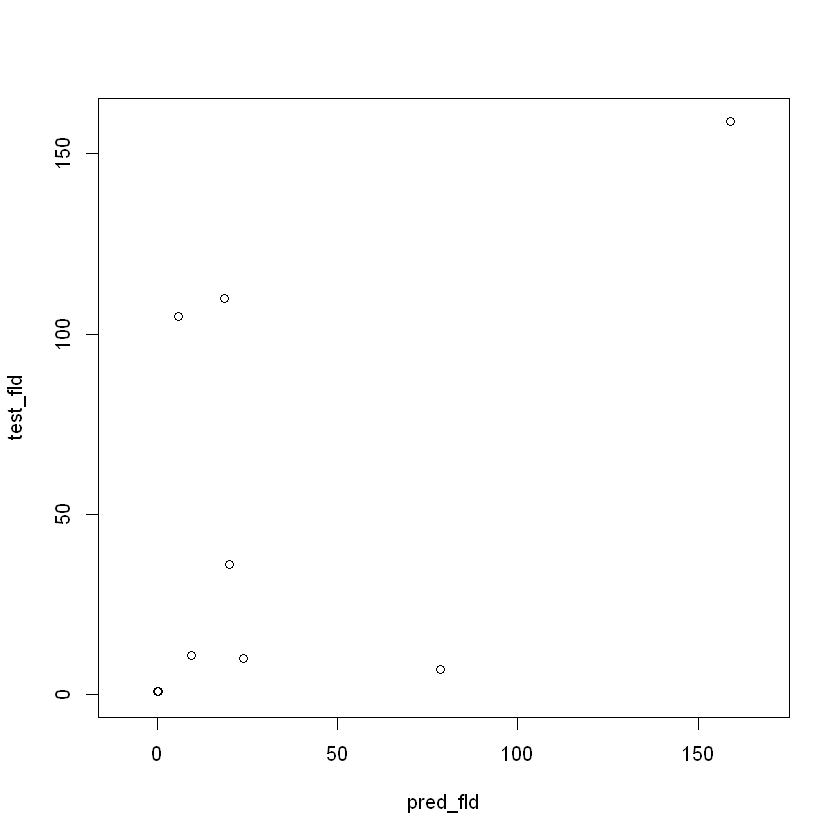

In [25]:
plot(pred_fld, test_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

In [26]:
with(output, cbind(res.deviance = deviance, df = df.residual, p = pchisq(deviance, df.residual, lower.tail=FALSE)))

ERROR: Error in pchisq(deviance, df.residual, lower.tail = FALSE): Non-numeric argument to mathematical function
